<a href="https://colab.research.google.com/github/rnlima8/Aula_do_dia_06out/blob/main/desafio_kaggle_5_trata0e1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 1.8MB 8.3MB/s 
     |████████████████████████████████| 13.9MB 311kB/s 
     |████████████████████████████████| 148.9MB 81kB/s 
     |████████████████████████████████| 1.6MB 45.2MB/s 
     |████████████████████████████████| 174kB 43.5MB/s 
     |████████████████████████████████| 276kB 47.9MB/s 
     |████████████████████████████████| 66.2MB 129kB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 266kB 36.8MB/s 
     |████████████████████████████████| 6.8MB 39.7MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 6.0MB 45.3MB/s 
     |████████████████████████████████| 163kB 36.2MB/s 
     |████████████████████████████████| 1.1MB 38.2MB/s 
     |████████████████████████████████| 327kB 43.1MB/s 
     |████████████████████████████████| 153kB 37.9MB/s 
     |████████████████████████████████| 81kB 7.6MB/s

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pycaret.classification import *

In [ ]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/train.csv'
df_churn_train = pd.read_csv(url)
df_churn_train

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [ ]:
df_churn_train_copy = df_churn_train.copy()

In [ ]:
#Normalizar as colunas
df_churn_train.columns = [col.lower() for col in df_churn_train.columns]
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [ ]:
df_churn_train.dtypes

id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [ ]:
#contar a variavel target
df_churn_train['churn'].value_counts()

0    4139
1    1495
Name: churn, dtype: int64

In [ ]:
df_churn_train['churn'].shape

(5634,)

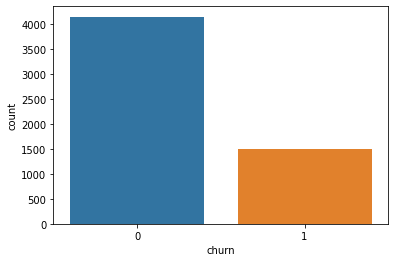

In [ ]:
sns.countplot( x ='churn', data = df_churn_train)

In [ ]:
#(linhas, colunas) do df
df_churn_train.shape

(5634, 21)

###análise tenure

Text(0.5, 1.0, 'box tenure')

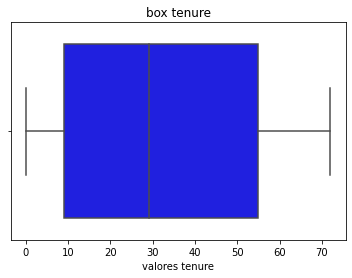

In [ ]:
#plota usando o Seaborn, somente tenure é float

plt.subplot(1,1, 1)
fig = sns.boxplot(x = 'tenure', data = df_churn_train, orient= 'h', color = 'b')
fig.set_xlabel('valores tenure')
fig.set_title('box tenure')


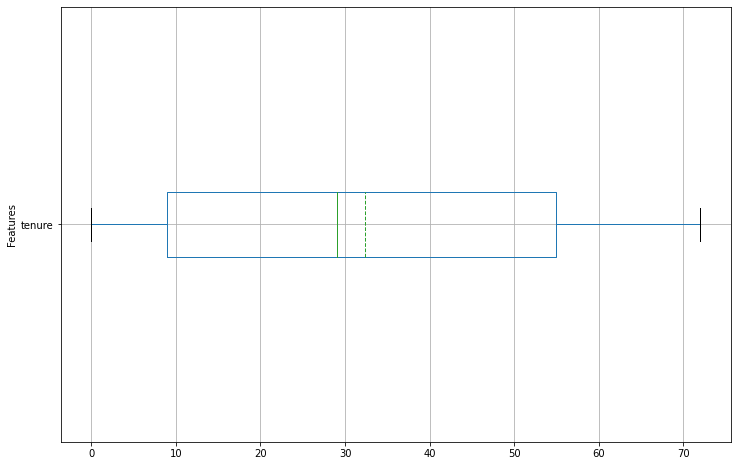

In [ ]:
#tenure não tem outliers 
df_churn_train[['tenure']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [ ]:
#isna para serie e df
#no df é mais detalhada
df_churn_train[['tenure']].isna().sum()

tenure    461
dtype: int64

In [ ]:
df_churn_train[['tenure']].value_counts()

tenure
1.0       438
72.0      259
2.0       166
3.0       149
4.0       132
71.0      129
7.0       100
5.0        99
70.0       92
8.0        90
6.0        87
10.0       85
12.0       82
9.0        81
13.0       80
68.0       78
11.0       75
17.0       72
67.0       71
15.0       71
22.0       71
69.0       70
18.0       70
24.0       69
23.0       65
56.0       64
25.0       63
35.0       63
52.0       62
26.0       61
14.0       60
30.0       56
64.0       56
62.0       56
66.0       56
16.0       56
41.0       55
65.0       54
19.0       54
47.0       54
63.0       54
27.0       54
29.0       53
54.0       52
46.0       52
43.0       51
51.0       51
60.0       51
53.0       51
49.0       50
50.0       50
32.0       49
55.0       48
58.0       48
21.0       48
20.0       48
45.0       47
38.0       47
34.0       46
37.0       46
40.0       46
42.0       46
28.0       45
31.0       45
61.0       44
48.0       44
57.0       43
33.0       43
59.0       43
36.0       40
39.0       40

In [ ]:
#substituição pela moda = 1.0
df_churn_train['tenure'].fillna(1.0, inplace = True)

In [ ]:
df_churn_train[['tenure']].isna().sum()

tenure    0
dtype: int64

In [ ]:
df_churn_train[['tenure']].describe()

,tenure
count,5634.000000
mean,29.769081
std,24.965201
min,0.000000
25%,5.000000
50%,24.500000
75%,53.000000
max,72.000000


In [ ]:
df_churn_train['tenure'].mean(), df_churn_train['tenure'].median(), df_churn_train['tenure'].mode()

(29.769080582179622, 24.5, 0    1.0
 dtype: float64)

In [ ]:
#29(53); 9 (81); 55(48), substutir por 27
#mp_q = (9*81+29*53+55*48)/(53+81+48)
#mp_q

In [ ]:
df_churn_train[df_churn_train['tenure']==55].count()

id                  48
gender              48
seniorcitizen       48
partner             48
dependents          46
tenure              48
phoneservice        48
multiplelines       48
internetservice     48
onlinesecurity      48
onlinebackup        48
deviceprotection    48
techsupport         48
streamingtv         48
streamingmovies     48
contract            48
paperlessbilling    48
paymentmethod       48
monthlycharges      48
totalcharges        48
churn               48
dtype: int64

In [ ]:
df_churn_train['tenure'].mode()

0    1.0
dtype: float64

In [ ]:
df_churn_train[df_churn_train['tenure']== 1.0]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,6731,Male,0,Yes,Yes,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
11,333,Male,0,No,No,1.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),94.90,4422.95,0
13,3427,Male,0,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.80,69.8,1
34,956,Male,0,Yes,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),44.70,44.7,1
45,3331,Male,1,No,No,1.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,97.80,4913.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,4642,Female,0,No,No,1.0,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.40,24.4,0
5596,236,Male,0,No,No,1.0,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.1,1
5613,3234,Male,1,Yes,No,1.0,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.90,118.25,0
5623,5123,Female,0,Yes,Yes,1.0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,49.85,1336.15,0


In [ ]:
l_valum = list(df_churn_train[df_churn_train['tenure']==1.0].index)
l_valum

[1,
 11,
 13,
 34,
 45,
 55,
 57,
 84,
 88,
 92,
 94,
 109,
 111,
 121,
 126,
 133,
 141,
 147,
 148,
 149,
 160,
 169,
 185,
 190,
 193,
 200,
 216,
 217,
 221,
 223,
 224,
 231,
 234,
 239,
 245,
 246,
 247,
 251,
 267,
 268,
 287,
 288,
 298,
 306,
 309,
 310,
 316,
 322,
 323,
 332,
 346,
 353,
 364,
 368,
 372,
 381,
 390,
 398,
 408,
 409,
 421,
 436,
 453,
 454,
 463,
 464,
 465,
 469,
 472,
 473,
 474,
 477,
 483,
 485,
 486,
 490,
 508,
 514,
 518,
 520,
 527,
 533,
 544,
 551,
 559,
 560,
 572,
 573,
 577,
 588,
 591,
 596,
 600,
 602,
 606,
 616,
 618,
 620,
 632,
 639,
 640,
 657,
 662,
 671,
 672,
 673,
 679,
 682,
 700,
 707,
 711,
 716,
 771,
 773,
 776,
 781,
 787,
 789,
 791,
 794,
 797,
 801,
 803,
 809,
 811,
 814,
 823,
 830,
 832,
 851,
 854,
 858,
 876,
 878,
 880,
 886,
 888,
 893,
 903,
 908,
 910,
 923,
 925,
 950,
 956,
 958,
 968,
 973,
 988,
 992,
 1003,
 1007,
 1010,
 1012,
 1023,
 1024,
 1025,
 1028,
 1044,
 1048,
 1049,
 1054,
 1068,
 1070,
 1078,
 1082,


In [ ]:
l_valzero = list(df_churn_train[df_churn_train['tenure']==0.0].index)
l_valzero


[161, 416, 1766, 2145, 3375, 3404, 4008, 5151]

In [ ]:
'''for f in l_valum:
    df_churn_train['totalcharges'][f] = df_churn_train['monthlycharges'][f]
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
'''for k in l_valzero:
    df_churn_train['totalcharges'][k] = 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_churn_train[df_churn_train['tenure']== 1.0]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,6731,Male,0,Yes,Yes,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
11,333,Male,0,No,No,1.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),94.90,4422.95,0
13,3427,Male,0,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.80,69.8,1
34,956,Male,0,Yes,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),44.70,44.7,1
45,3331,Male,1,No,No,1.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,97.80,4913.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,4642,Female,0,No,No,1.0,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.40,24.4,0
5596,236,Male,0,No,No,1.0,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.1,1
5613,3234,Male,1,Yes,No,1.0,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.90,118.25,0
5623,5123,Female,0,Yes,Yes,1.0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,49.85,1336.15,0


In [ ]:
df_churn_train[['tenure']].isna().sum()

tenure    0
dtype: int64

In [ ]:
#df['BrandName'].replace( to_replace=['ABC', 'AB'], value='A', inplace=True
#df_churn_train['tenure'].replace(to_replace = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], value = 1.0, inplace = True)

In [ ]:
#df_churn_train[df_churn_train['tenure'] == 0].value_counts()

Series([], dtype: int64)

In [ ]:
#substituição pela moda = 1.0
#df_churn_train['tenure'].fillna(1.0, inplace = True)

###tratar dependentes

In [ ]:
#df_churn_train
l_index_churn_na_dep = list(df_churn_train[df_churn_train['dependents'].isna()].index)
l_index_churn_na_dep

[73,
 89,
 110,
 156,
 179,
 222,
 287,
 293,
 301,
 324,
 335,
 337,
 394,
 492,
 496,
 522,
 545,
 546,
 574,
 636,
 698,
 726,
 807,
 815,
 835,
 845,
 879,
 898,
 901,
 978,
 980,
 991,
 1000,
 1017,
 1047,
 1056,
 1061,
 1063,
 1096,
 1104,
 1183,
 1188,
 1208,
 1222,
 1315,
 1318,
 1367,
 1393,
 1427,
 1446,
 1461,
 1473,
 1483,
 1507,
 1512,
 1545,
 1572,
 1576,
 1578,
 1618,
 1649,
 1670,
 1694,
 1755,
 1757,
 1769,
 1801,
 1851,
 1864,
 1990,
 1997,
 1998,
 2019,
 2028,
 2046,
 2057,
 2095,
 2097,
 2098,
 2102,
 2116,
 2123,
 2128,
 2156,
 2169,
 2197,
 2213,
 2268,
 2311,
 2316,
 2335,
 2339,
 2386,
 2394,
 2446,
 2448,
 2458,
 2462,
 2484,
 2487,
 2503,
 2507,
 2510,
 2553,
 2575,
 2620,
 2648,
 2687,
 2694,
 2727,
 2733,
 2734,
 2736,
 2752,
 2754,
 2758,
 2763,
 2785,
 2832,
 2833,
 2839,
 2840,
 2889,
 2920,
 2933,
 2964,
 3056,
 3115,
 3127,
 3144,
 3164,
 3166,
 3184,
 3199,
 3252,
 3266,
 3284,
 3286,
 3288,
 3414,
 3419,
 3440,
 3458,
 3526,
 3556,
 3584,
 3587,
 3600

In [ ]:
df_churn_train[['dependents']].value_counts()

dependents
No            3793
Yes           1623
dtype: int64

In [ ]:
#tratamento da feature dependents no df_churn_train subs pelo q mias repete
s = 0
for c in l_index_churn_na_dep:
    s = s + 1  
    if s < 65:
        df_churn_train['dependents'][c] = 'No'
    else:
        df_churn_train['dependents'][c] = 'No'

In [ ]:
df_churn_train.isna().sum()

id                   0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod       99
monthlycharges       0
totalcharges         0
churn                0
dtype: int64

###tratamento paymentmethod

In [ ]:
#lista isna df_churn_train
l_index_pay_c = list(df_churn_train[df_churn_train['paymentmethod'].isna()].index)
l_index_pay_c

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [ ]:
df_churn_train['paymentmethod'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [ ]:
#tratamento da feature dependents no df_churn_train
for c in l_index_pay_c:
    df_churn_train['paymentmethod'][c] = 'Electronic check'
    
    

In [ ]:
df_churn_train['paymentmethod'].value_counts()

Electronic check             1986
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [ ]:
df_churn_train.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

###totalcharges

In [ ]:
df_churn_train['totalcharges'] = df_churn_train['totalcharges'].str.replace(',', '.')
df_churn_train['totalcharges'] = pd.to_numeric(df_churn_train['totalcharges'], errors= 'coerce')

In [ ]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Electronic check,45.05,2560.10,0
1,6731,Male,0,Yes,Yes,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


In [ ]:
df_churn_train[['totalcharges']].isna().sum()

totalcharges    8
dtype: int64

In [ ]:
c = list(df_churn_train[df_churn_train['totalcharges'].isna()].index)
c

[161, 416, 1766, 2145, 3375, 3404, 4008, 5151]

In [ ]:
df_churn_train['tenure'][161]

0.0

In [ ]:
df_churn_train['totalcharges'].mode()

0    20.2
dtype: float64

In [ ]:
#df_churn_train['monthlycharges'][161] SUBT PELA MODA
for i in c:
    df_churn_train['totalcharges'][i] = 20.2


In [ ]:
df_churn_train['totalcharges'][5151]

20.2

In [ ]:
df_churn_train[df_churn_train['tenure']== 1.0]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,6731,Male,0,Yes,Yes,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
11,333,Male,0,No,No,1.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),94.90,4422.95,0
13,3427,Male,0,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.80,69.80,1
34,956,Male,0,Yes,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),44.70,44.70,1
45,3331,Male,1,No,No,1.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,97.80,4913.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,4642,Female,0,No,No,1.0,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.40,24.40,0
5596,236,Male,0,No,No,1.0,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.10,1
5613,3234,Male,1,Yes,No,1.0,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.90,118.25,0
5623,5123,Female,0,Yes,Yes,1.0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,49.85,1336.15,0


In [ ]:
for f in l_valum:
    df_churn_train['totalcharges'][f] = df_churn_train['monthlycharges'][f]

In [ ]:
for k in l_valzero:
    df_churn_train['totalcharges'][k] = 0.0

In [ ]:
df_churn_train[df_churn_train['tenure']== 0.0]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
161,6755,Male,0,No,Yes,0.0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,0
416,5219,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,0
1766,6671,Female,0,Yes,Yes,0.0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,0
2145,937,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0
3375,3827,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,0
3404,1083,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,0
4008,3332,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,0
5151,1341,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0


###tratando as categoricas

In [ ]:
df_churn_train.gender.replace(['Female', 'Male'], [1, 0], inplace=True)
df_churn_train.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_train.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_train.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)
#df_churn_train.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
df_churn_train.internetservice.replace(['Fiber optic', 'DSL', 'No'], [1,2,0], inplace=True)
df_churn_train.paymentmethod.replace(['Electronic check', 'Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)'], [1,2,3,4], inplace=True)
df_churn_train.contract.replace(['Two year', 'One year', 'Month-to-month'], [2,1,0], inplace=True)
df_churn_train.multiplelines.replace(['No', 'Yes', 'No phone service'], [0,1,3], inplace=True)
df_churn_train.onlinesecurity.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 
df_churn_train.onlinebackup.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.deviceprotection.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.techsupport.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.streamingtv.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.streamingmovies.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 



In [ ]:
df_churn_train.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,1,0,0,No,56.0,0,3,2,1,1,1,1,0,0,2,0,1,45.05,2560.10,0
1,6731,0,0,1,Yes,1.0,1,0,0,2,2,2,2,2,2,1,0,3,19.65,19.65,0
2,6479,1,0,1,No,60.0,1,1,1,0,1,1,1,1,1,2,1,4,110.80,6640.70,0
3,6861,1,0,0,No,37.0,1,1,1,0,1,1,0,1,1,0,1,2,101.90,3545.35,1
4,3266,0,0,1,Yes,29.0,1,0,1,0,0,0,0,0,0,0,1,1,70.75,1974.80,1


In [ ]:
df_churn_train.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,1,0,0,0,56.0,0,3,2,1,1,1,1,0,0,2,0,1,45.05,2560.10,0
1,6731,0,0,1,1,1.0,1,0,0,2,2,2,2,2,2,1,0,3,19.65,19.65,0
2,6479,1,0,1,0,60.0,1,1,1,0,1,1,1,1,1,2,1,4,110.80,6640.70,0
3,6861,1,0,0,0,37.0,1,1,1,0,1,1,0,1,1,0,1,2,101.90,3545.35,1
4,3266,0,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,1,70.75,1974.80,1


In [ ]:
df_churn_train.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np

#####tratando o DF teste

In [ ]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/test.csv'
df_churn_test = pd.read_csv(url)
df_churn_test

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4897,Male,0,No,NaN,24.0,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.70,1167.8
1405,6940,Male,0,No,No,35.0,Yes,No,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.3
1406,804,Female,0,Yes,No,46.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),64.20,3009.5
1407,1143,Male,1,Yes,Yes,11.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.20,775.3


In [ ]:
#Normalizar as colunas
df_churn_test.columns = [col.lower() for col in df_churn_test.columns]
df_churn_test.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [ ]:
df_churn_test.dtypes

id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
dtype: object

In [ ]:
df_churn_test.shape

(1409, 20)

In [ ]:
df_churn_test.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents           41
tenure              118
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        30
monthlycharges        0
totalcharges          0
dtype: int64

In [ ]:
#criar uma lista dos index nan na feature dependents
l_index_na_dep = list(df_churn_test[df_churn_test['dependents'].isna()].index)
l_index_na_dep

[46,
 69,
 79,
 129,
 147,
 153,
 156,
 190,
 235,
 301,
 372,
 386,
 404,
 423,
 476,
 497,
 498,
 543,
 555,
 637,
 666,
 718,
 728,
 744,
 767,
 842,
 869,
 874,
 876,
 1030,
 1031,
 1088,
 1093,
 1109,
 1124,
 1140,
 1152,
 1335,
 1337,
 1402,
 1404]

In [ ]:
#conta os No e Yes
df_churn_test[['dependents']].value_counts()

dependents
No            953
Yes           415
dtype: int64

In [ ]:
dependents_na = df_churn_test['dependents'].isna().sum()
dependents_na

41

In [ ]:
#calcula a % excluindo os na
df_churn_test[['dependents']].value_counts()/(df_churn_test.shape[0]-dependents_na)*100

dependents
No            69.663743
Yes           30.336257
dtype: float64

In [ ]:
#(29)
f = 41*0.6966
f

28.5606

In [ ]:
# (11)
41*0.3033

12.4353

In [ ]:
#tratamento da feature dependents(mais se repete)
s = 0
for c in l_index_na_dep:
    s = s + 1  
    if s <= 29:
        df_churn_test['dependents'][c] = 'No'
    else:
        df_churn_test['dependents'][c] = 'No'

In [ ]:
df_churn_test.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure              118
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        30
monthlycharges        0
totalcharges          0
dtype: int64

In [ ]:
l_index_pay = list(df_churn_test[df_churn_test['paymentmethod'].isna()].index)
l_index_pay

[1,
 13,
 27,
 29,
 67,
 143,
 193,
 207,
 254,
 297,
 349,
 375,
 425,
 453,
 758,
 774,
 783,
 847,
 855,
 896,
 898,
 988,
 1075,
 1160,
 1276,
 1284,
 1319,
 1357,
 1367,
 1376]

In [ ]:
#tratamento da feature dependents no df_pay_trat_na
for c in l_index_pay:
    df_churn_test['paymentmethod'][c] = 'Electronic check'
     

In [ ]:
df_churn_test.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure              118
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          0
dtype: int64

In [ ]:
#isna para serie e df
#no df é mais detalhada
df_churn_test[['tenure']].isna().sum()

tenure    118
dtype: int64

In [ ]:
df_churn_test[['tenure']].describe()

,tenure
count,1291.000000
mean,32.460883
std,24.843710
min,0.000000
25%,9.000000
50%,29.000000
75%,57.000000
max,72.000000


In [ ]:
df_churn_test[df_churn_test['tenure']==57].count()

id                  15
gender              15
seniorcitizen       15
partner             15
dependents          15
tenure              15
phoneservice        15
multiplelines       15
internetservice     15
onlinesecurity      15
onlinebackup        15
deviceprotection    15
techsupport         15
streamingtv         15
streamingmovies     15
contract            15
paperlessbilling    15
paymentmethod       15
monthlycharges      15
totalcharges        15
dtype: int64

In [ ]:
#29(53); 9 (81); 55(48), substutir por 28
mp_q = (9*24+29*13+57*15)/(24+13+15)
mp_q

27.846153846153847

In [ ]:
df_churn_test['tenure'].mode()

0    1.0
dtype: float64

In [ ]:
#substituição dos na por mp_q = 28
df_churn_test['tenure'].fillna(1.0, inplace = True)

In [ ]:
df_churn_test.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [ ]:
df_churn_test['totalcharges'] = df_churn_test['totalcharges'].str.replace(',', '.')
df_churn_test['totalcharges'] = pd.to_numeric(df_churn_test['totalcharges'], errors= 'coerce')

In [ ]:
df_churn_test[['totalcharges']].isna().sum()

totalcharges    3
dtype: int64

In [ ]:
l_index_charg = list(df_churn_test[df_churn_test['totalcharges'].isna()].index)
l_index_charg

[313, 1063, 1297]

In [ ]:
df_churn_test['totalcharges'].mode()

0    19.75
1    20.20
dtype: float64

In [ ]:
#df_churn_test['monthlycharges'][313]
for i in l_index_charg:
    df_churn_test['totalcharges'][i] =20.20


In [ ]:
df_churn_test.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [ ]:
df_churn_test[df_churn_test['tenure']==1.0]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
8,5746,Female,0,Yes,Yes,1.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20
15,3117,Female,1,No,No,1.0,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,One year,No,Credit card (automatic),89.15,3990.75
32,2790,Female,0,No,No,1.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.95,2072.75
34,6376,Female,0,No,No,1.0,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.30,74.30
37,4091,Female,0,No,Yes,1.0,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,49.90,49.90
38,4511,Female,0,No,No,1.0,Yes,Yes,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,No,Credit card (automatic),68.15,2656.30
39,1174,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.85,19.85
41,2943,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,19.95,907.05
42,5554,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,55.70,55.70
54,2000,Male,0,No,No,1.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,1710.45


In [ ]:
l_valzero_t = list(df_churn_test[df_churn_test['tenure']==0.0].index)
l_valzero_t

[313, 1063, 1297]

In [ ]:
l_valum_t = list(df_churn_test[df_churn_test['tenure']==1.0].index)
l_valum_t

[8,
 15,
 32,
 34,
 37,
 38,
 39,
 41,
 42,
 54,
 64,
 65,
 69,
 82,
 93,
 95,
 102,
 103,
 107,
 110,
 111,
 112,
 113,
 117,
 118,
 125,
 145,
 147,
 149,
 150,
 156,
 169,
 172,
 173,
 181,
 184,
 185,
 193,
 213,
 220,
 227,
 229,
 238,
 242,
 246,
 251,
 268,
 277,
 287,
 288,
 295,
 297,
 300,
 318,
 324,
 328,
 333,
 339,
 340,
 351,
 355,
 360,
 363,
 367,
 375,
 376,
 377,
 404,
 415,
 417,
 425,
 443,
 461,
 467,
 476,
 479,
 483,
 486,
 487,
 489,
 490,
 493,
 495,
 498,
 504,
 508,
 511,
 513,
 515,
 516,
 517,
 518,
 531,
 532,
 552,
 553,
 561,
 562,
 563,
 573,
 595,
 599,
 615,
 616,
 621,
 624,
 629,
 635,
 636,
 638,
 641,
 652,
 654,
 660,
 661,
 662,
 663,
 669,
 677,
 678,
 680,
 693,
 705,
 713,
 728,
 729,
 734,
 738,
 740,
 744,
 747,
 751,
 757,
 764,
 765,
 786,
 791,
 796,
 805,
 810,
 816,
 817,
 820,
 827,
 831,
 835,
 842,
 855,
 857,
 858,
 859,
 861,
 866,
 880,
 885,
 886,
 888,
 897,
 908,
 909,
 910,
 912,
 918,
 925,
 926,
 928,
 949,
 952,
 953,
 95

In [ ]:
for a in l_valum_t:
    df_churn_test['totalcharges'][a] = df_churn_test['monthlycharges'][a]

In [ ]:
for b in l_valzero_t:
    df_churn_train['totalcharges'][b] = 0.0

In [ ]:
df_churn_test.gender.replace(['Female', 'Male'], [1, 0], inplace=True)
df_churn_test.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_test.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_test.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)


In [ ]:
df_churn_test.internetservice.replace(['Fiber optic', 'DSL', 'No'], [1,2,0], inplace=True)
df_churn_test.paymentmethod.replace(['Electronic check', 'Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)'], [1,2,3,4], inplace=True)
df_churn_test.contract.replace(['Two year', 'One year', 'Month-to-month'], [2,1,0], inplace=True)
df_churn_test.multiplelines.replace(['No', 'Yes', 'No phone service'], [0,1,3], inplace=True)
df_churn_test.onlinesecurity.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 
df_churn_test.onlinebackup.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.deviceprotection.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.techsupport.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.streamingtv.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.streamingmovies.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 


In [ ]:
df_churn_test.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,0,0,1,Yes,23.0,1,0,0,2,2,2,2,2,2,1,1,4,20.00,445.30
1,1733,0,1,1,Yes,61.0,1,1,1,0,1,0,0,1,1,1,0,1,99.00,5969.30
2,5384,0,0,0,No,36.0,1,1,1,0,0,0,0,0,1,0,1,1,84.75,3050.15
3,6554,1,0,1,Yes,61.0,0,3,2,0,1,1,1,1,1,2,1,2,61.45,3751.15
4,364,1,0,0,No,47.0,1,0,0,2,2,2,2,2,2,2,1,3,20.55,945.70


In [ ]:
df_churn_test.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
df_churn_test.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,0,0,1,1,23.0,1,0,0,2,2,2,2,2,2,1,1,4,20.00,445.30
1,1733,0,1,1,1,61.0,1,1,1,0,1,0,0,1,1,1,0,1,99.00,5969.30
2,5384,0,0,0,0,36.0,1,1,1,0,0,0,0,0,1,0,1,1,84.75,3050.15
3,6554,1,0,1,1,61.0,0,3,2,0,1,1,1,1,1,2,1,2,61.45,3751.15
4,364,1,0,0,0,47.0,1,0,0,2,2,2,2,2,2,2,1,3,20.55,945.70


In [ ]:
df_churn_test.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

###aplicando o autolml

In [ ]:
clf = setup(data = df_churn_train,
            target = 'churn',
            #numeric_features = ['tenure', 'monthlycharges', 'totalcharges'] 
            #numeric_imputation = 'mean'
            categorical_features = ['gender', 'seniorcitizen','partner', 'dependents',
            'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
            'onlinebackup', 'deviceprotection', 'techsupport','streamingtv',
            'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'], # lista das variáveis categóricas
            ignore_features = ['id'],
            session_id = 28021968,
            silent = False)

,Description,Value
0,session_id,28021968
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5634, 21)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8083,0.8502,0.7289,0.8013,0.8028,0.4806,0.4843,0.423
ridge,Ridge Classifier,0.8075,0.0000,0.7182,0.7981,0.7994,0.4674,0.4736,0.023
gbc,Gradient Boosting Classifier,0.8052,0.8491,0.7269,0.7982,0.8001,0.4744,0.4773,0.549
lda,Linear Discriminant Analysis,0.8037,0.8414,0.7301,0.7982,0.7999,0.4762,0.4782,0.035
ada,Ada Boost Classifier,0.8032,0.8461,0.7242,0.7965,0.7980,0.4689,0.4723,0.230
catboost,CatBoost Classifier,0.7999,0.8425,0.7140,0.7910,0.7931,0.4531,0.4573,3.617
rf,Random Forest Classifier,0.7938,0.8240,0.6996,0.7828,0.7849,0.4285,0.4344,0.732
lightgbm,Light Gradient Boosting Machine,0.7928,0.8368,0.7116,0.7854,0.7877,0.4422,0.4447,0.121
xgboost,Extreme Gradient Boosting,0.7816,0.8216,0.6963,0.7733,0.7759,0.4107,0.4134,0.855
et,Extra Trees Classifier,0.7773,0.7983,0.6838,0.7663,0.7694,0.3899,0.3939,0.711


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=28021968, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8025,0.8316,0.7455,0.8025,0.8025,0.4910,0.4910
1,0.8076,0.8509,0.7304,0.8006,0.8029,0.4816,0.4838
2,0.7924,0.8480,0.7015,0.7820,0.7848,0.4296,0.4339
3,0.8553,0.8724,0.7735,0.8505,0.8483,0.5935,0.6032
4,0.7893,0.8485,0.6966,0.7783,0.7812,0.4203,0.4249
5,0.8173,0.8503,0.7587,0.8151,0.8161,0.5238,0.5240
6,0.7944,0.8349,0.7185,0.7882,0.7906,0.4523,0.4536
7,0.7944,0.8363,0.7000,0.7832,0.7856,0.4305,0.4363
8,0.7919,0.8338,0.6921,0.7795,0.7815,0.4177,0.4250
9,0.8376,0.8953,0.7725,0.8328,0.8342,0.5659,0.5678


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8076,0.8335,0.7489,0.8064,0.8070,0.5009,0.5010
1,0.8025,0.8482,0.7239,0.7953,0.7977,0.4680,0.4701
2,0.7924,0.8479,0.7015,0.7820,0.7848,0.4296,0.4339
3,0.8553,0.8719,0.7703,0.8509,0.8476,0.5907,0.6021
4,0.7893,0.8453,0.6935,0.7776,0.7803,0.4165,0.4220
5,0.8173,0.8502,0.7587,0.8151,0.8161,0.5238,0.5240
6,0.8020,0.8368,0.7329,0.7976,0.7994,0.4776,0.4783
7,0.7970,0.8373,0.6986,0.7852,0.7868,0.4319,0.4395
8,0.7919,0.8336,0.6952,0.7801,0.7824,0.4216,0.4278
9,0.8401,0.8922,0.7804,0.8364,0.8377,0.5767,0.5778


In [ ]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8101,0.0,0.7352,0.8037,0.8059,0.4901,0.4920
1,0.8127,0.0,0.7369,0.8060,0.8081,0.4953,0.4975
2,0.7975,0.0,0.6957,0.7852,0.7864,0.4285,0.4373
3,0.8376,0.0,0.7458,0.8308,0.8285,0.5389,0.5502
4,0.7893,0.0,0.6935,0.7776,0.7803,0.4165,0.4220
5,0.8249,0.0,0.7423,0.8172,0.8181,0.5181,0.5238
6,0.7919,0.0,0.7075,0.7832,0.7860,0.4366,0.4393
7,0.7868,0.0,0.6825,0.7731,0.7751,0.3995,0.4077
8,0.7919,0.0,0.6798,0.7777,0.7773,0.4017,0.4146
9,0.8325,0.0,0.7629,0.8269,0.8284,0.5494,0.5520


In [ ]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8101,0.0,0.7352,0.8037,0.8059,0.4901,0.4920
1,0.8152,0.0,0.7417,0.8090,0.8110,0.5037,0.5057
2,0.7975,0.0,0.6957,0.7852,0.7864,0.4285,0.4373
3,0.8325,0.0,0.7361,0.8251,0.8223,0.5212,0.5340
4,0.7868,0.0,0.6917,0.7752,0.7781,0.4114,0.4164
5,0.8223,0.0,0.7406,0.8146,0.8158,0.5127,0.5178
6,0.7970,0.0,0.7141,0.7886,0.7912,0.4503,0.4531
7,0.7817,0.0,0.6729,0.7667,0.7687,0.3810,0.3902
8,0.7944,0.0,0.6846,0.7809,0.7806,0.4110,0.4234
9,0.8325,0.0,0.7629,0.8269,0.8284,0.5494,0.5520


In [ ]:
#modelo bagg
dt_gbc = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8228,0.8396,0.7561,0.8181,0.8198,0.5286,0.5298
1,0.8051,0.8476,0.7256,0.7975,0.7999,0.4731,0.4756
2,0.8025,0.8486,0.7084,0.7919,0.7936,0.4502,0.4568
3,0.8325,0.8635,0.7455,0.8250,0.8248,0.5309,0.5388
4,0.7944,0.8560,0.7031,0.7839,0.7865,0.4343,0.4390
5,0.8071,0.8402,0.7364,0.8018,0.8039,0.4878,0.4889
6,0.8020,0.8490,0.7329,0.7976,0.7994,0.4776,0.4783
7,0.8046,0.8327,0.7192,0.7956,0.7978,0.4657,0.4698
8,0.8147,0.8465,0.7230,0.8053,0.8059,0.4833,0.4911
9,0.8223,0.8898,0.7498,0.8162,0.8180,0.5221,0.5245


In [ ]:
dt_bagged = ensemble_model(dt_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8278,0.8416,0.7534,0.8214,0.8230,0.5332,0.5364
1,0.7975,0.8479,0.7204,0.7909,0.7933,0.4578,0.4593
2,0.7949,0.8479,0.6909,0.7821,0.7832,0.4194,0.4287
3,0.8274,0.8600,0.7389,0.8193,0.8194,0.5167,0.5244
4,0.7970,0.8580,0.6986,0.7852,0.7868,0.4319,0.4395
5,0.8096,0.8412,0.7350,0.8032,0.8054,0.4897,0.4916
6,0.7970,0.8421,0.7264,0.7923,0.7943,0.4642,0.4649
7,0.7944,0.8384,0.6938,0.7821,0.7837,0.4229,0.4309
8,0.8198,0.8413,0.7327,0.8113,0.8120,0.5008,0.5075
9,0.8274,0.8911,0.7502,0.8205,0.8218,0.5297,0.5339


In [ ]:
tuned_gbc = tune_model(gbc_before)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8203,0.8407,0.7297,0.8114,0.8117,0.4979,0.5058
1,0.8000,0.8487,0.7129,0.7906,0.7931,0.4523,0.4563
2,0.7924,0.8510,0.6861,0.7790,0.7800,0.4102,0.4201
3,0.8299,0.8595,0.7343,0.8221,0.8201,0.5156,0.5273
4,0.7843,0.8502,0.6777,0.7699,0.7719,0.3903,0.3990
5,0.8223,0.8403,0.7406,0.8146,0.8158,0.5127,0.5178
6,0.8096,0.8453,0.7319,0.8024,0.8046,0.4864,0.4889
7,0.7995,0.8369,0.7004,0.7878,0.7890,0.4371,0.4454
8,0.8020,0.8407,0.6959,0.7900,0.7892,0.4347,0.4469
9,0.8274,0.8946,0.7378,0.8195,0.8188,0.5171,0.5262


In [ ]:
#gbc = create_model('gbc') 1 tentativa

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8203,0.8612,0.7297,0.8114,0.8117,0.4979,0.5058
1,0.8051,0.8554,0.7132,0.7949,0.7967,0.4591,0.4652
2,0.8354,0.8804,0.7603,0.8291,0.8299,0.5526,0.5574
3,0.8122,0.8618,0.7244,0.8031,0.8045,0.4815,0.4873
4,0.8299,0.8575,0.7642,0.8252,0.8268,0.5470,0.5485
5,0.7970,0.8659,0.7233,0.7913,0.7935,0.4608,0.4619
6,0.7893,0.8554,0.6842,0.7758,0.7773,0.4046,0.4137
7,0.7893,0.8239,0.6842,0.7758,0.7773,0.4046,0.4137
8,0.7944,0.8341,0.7123,0.7863,0.7890,0.4453,0.4476
9,0.8046,0.8581,0.7131,0.7944,0.7961,0.4587,0.4648


In [ ]:
#lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7722,0.8101,0.6747,0.7593,0.7630,0.3745,0.3789
1,0.8456,0.8933,0.7733,0.8401,0.8403,0.5801,0.5851
2,0.8051,0.8513,0.7488,0.8045,0.8048,0.4991,0.4991
3,0.8046,0.8606,0.7304,0.7980,0.8003,0.4796,0.4815
4,0.8173,0.8631,0.7390,0.8098,0.8115,0.5056,0.5095
5,0.8020,0.8424,0.7104,0.7917,0.7932,0.4539,0.4604
6,0.8350,0.8876,0.7602,0.8287,0.8294,0.5522,0.5570
7,0.7792,0.8144,0.7009,0.7725,0.7751,0.4157,0.4168
8,0.8401,0.8484,0.7819,0.8364,0.8377,0.5795,0.5806
9,0.8198,0.8485,0.7450,0.8132,0.8151,0.5137,0.5165


In [ ]:
#tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7848,0.8124,0.6985,0.7753,0.7784,0.4187,0.4215
1,0.8456,0.8933,0.7733,0.8401,0.8403,0.5801,0.5851
2,0.8051,0.8518,0.7488,0.8045,0.8048,0.4991,0.4991
3,0.8046,0.8597,0.7334,0.7989,0.8010,0.4829,0.4842
4,0.8173,0.8630,0.7390,0.8098,0.8115,0.5056,0.5095
5,0.8046,0.8420,0.7152,0.7947,0.7963,0.4626,0.4687
6,0.8401,0.8914,0.7697,0.8345,0.8353,0.5688,0.5727
7,0.7665,0.8134,0.6801,0.7575,0.7609,0.3763,0.3780
8,0.8299,0.8526,0.7658,0.8253,0.8268,0.5500,0.5515
9,0.8096,0.8470,0.7319,0.8024,0.8046,0.4864,0.4889


In [ ]:
#tuned_gbc = tune_model(gbc) 1 tentaiva

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8152,0.8634,0.7232,0.8058,0.8064,0.4837,0.4915
1,0.8127,0.8586,0.7276,0.8040,0.8058,0.4853,0.4900
2,0.8278,0.8852,0.7491,0.8207,0.8217,0.5304,0.5356
3,0.8046,0.8595,0.7192,0.7956,0.7978,0.4657,0.4698
4,0.8376,0.8580,0.7694,0.8323,0.8336,0.5631,0.5657
5,0.8173,0.8708,0.7433,0.8108,0.8128,0.5085,0.5108
6,0.7893,0.8556,0.6842,0.7758,0.7773,0.4046,0.4137
7,0.7944,0.8259,0.7000,0.7832,0.7856,0.4305,0.4363
8,0.8046,0.8295,0.7254,0.7970,0.7994,0.4727,0.4752
9,0.8274,0.8612,0.7409,0.8196,0.8196,0.5203,0.5280


In [ ]:
predic = predict_model(tuned_ridge, data = df_churn_test)
predic

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,Label
0,0,0,1,1,23.0,1,0,0,2,2,2,2,2,2,1,1,4,20.00,445.30,0
1,0,1,1,1,61.0,1,1,1,0,1,0,0,1,1,1,0,1,99.00,5969.30,0
2,0,0,0,0,36.0,1,1,1,0,0,0,0,0,1,0,1,1,84.75,3050.15,1
3,1,0,1,1,61.0,0,3,2,0,1,1,1,1,1,2,1,2,61.45,3751.15,0
4,1,0,0,0,47.0,1,0,0,2,2,2,2,2,2,2,1,3,20.55,945.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,0,0,0,24.0,1,0,2,0,0,1,0,0,0,0,1,3,49.70,1167.80,0
1405,0,0,0,0,35.0,1,0,1,1,0,0,1,0,1,1,1,1,89.20,3251.30,0
1406,1,0,1,0,46.0,1,0,2,0,1,0,1,1,0,2,1,4,64.20,3009.50,0
1407,0,1,1,1,11.0,1,1,1,0,0,0,0,0,0,0,1,4,75.20,775.30,1


In [ ]:
predic['Score'].mean()

KeyError: ignored

In [ ]:
#predic['Score'].mean() 1 tent

0.7986972320794897

In [ ]:
pred_val = predic['Label']

In [ ]:
#ids = df_churn_test.index
#sol = pd.DataFrame({'id': ids, 'Churn':pred_val})
#sol

,id,Churn
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1404,1404,0
1405,1405,0
1406,1406,0
1407,1407,1


In [ ]:
#sol.to_csv('submis2.csv')

In [ ]:
#files.download('submis2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

In [ ]:
ids = df_churn_test['id']
output = pd.DataFrame({'id': ids, 'Churn': pred_val})
output.to_csv('submissionrid1.csv', index=False)
files.download('submissionrid1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output

,id,Churn
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1404,1404,0
1405,1405,0
1406,1406,0
1407,1407,1


In [ ]:
#files.download('submission.csv')

FileNotFoundError: ignored

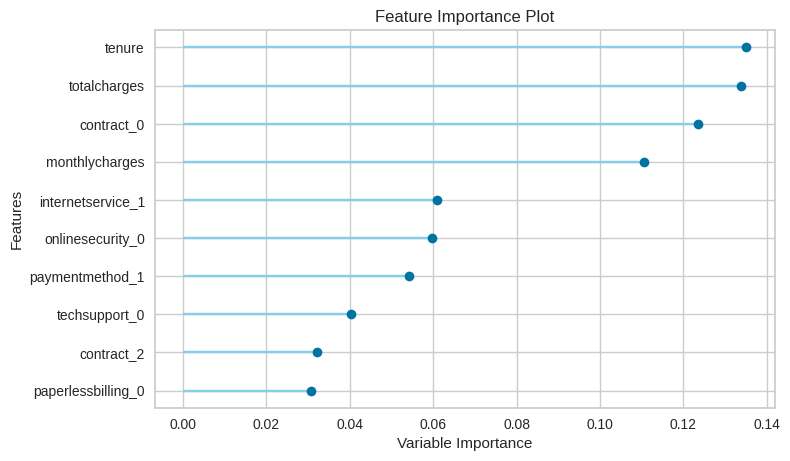

In [ ]:
plot_model(estimator = tuned_gbc, plot = 'feature')

In [ ]:
catb = create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8051,0.8404,0.7173,0.7959,0.7982,0.4623,0.4664
1,0.8228,0.8651,0.7105,0.8148,0.8082,0.4780,0.4984
2,0.7924,0.8294,0.7025,0.7826,0.7856,0.4293,0.4327
3,0.8299,0.8799,0.7406,0.8221,0.8217,0.5222,0.5307
4,0.8071,0.8514,0.7136,0.7970,0.7989,0.4594,0.4651
5,0.8249,0.8555,0.7479,0.8183,0.8201,0.5207,0.5235
6,0.8096,0.8649,0.7376,0.8047,0.8067,0.4893,0.4902
7,0.8020,0.8548,0.7165,0.7936,0.7962,0.4563,0.4592
8,0.8274,0.8660,0.7592,0.8227,0.8244,0.5354,0.5367
9,0.8198,0.8416,0.7508,0.8152,0.8170,0.5165,0.5175


In [ ]:
tuned_catb = tune_model(catb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.8445,0.7290,0.8089,0.8101,0.4921,0.4981
1,0.8228,0.8693,0.7105,0.8148,0.8082,0.4780,0.4984
2,0.7924,0.8402,0.7088,0.7844,0.7873,0.4368,0.4388
3,0.8376,0.8794,0.7552,0.8308,0.8308,0.5482,0.5549
4,0.8046,0.8464,0.7214,0.7967,0.7993,0.4651,0.4677
5,0.8274,0.8530,0.7496,0.8207,0.8224,0.5260,0.5293
6,0.8122,0.8697,0.7266,0.8037,0.8059,0.4807,0.4846
7,0.8274,0.8569,0.7592,0.8227,0.8244,0.5354,0.5367
8,0.8299,0.8621,0.7481,0.8227,0.8239,0.5283,0.5330
9,0.7995,0.8398,0.7244,0.7942,0.7964,0.4620,0.4629


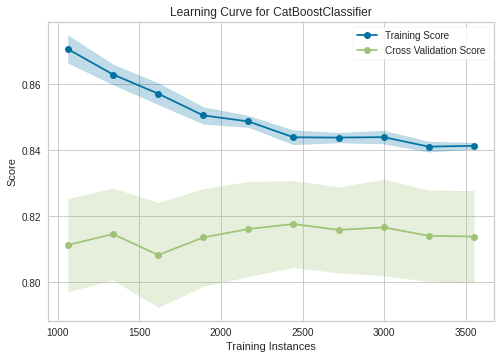

In [ ]:
plot_model(estimator = tuned_catb, plot = 'learning')

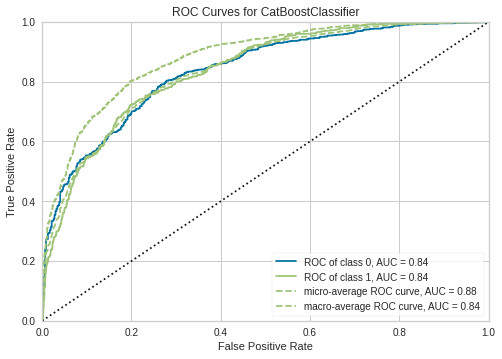

In [ ]:
plot_model(estimator = tuned_catb, plot = 'auc')

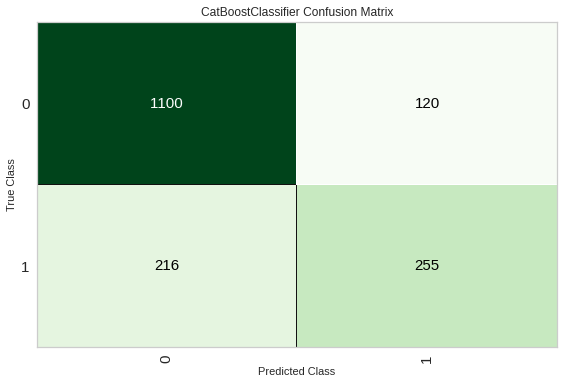

In [ ]:
plot_model(estimator = tuned_catb, plot = 'confusion_matrix')

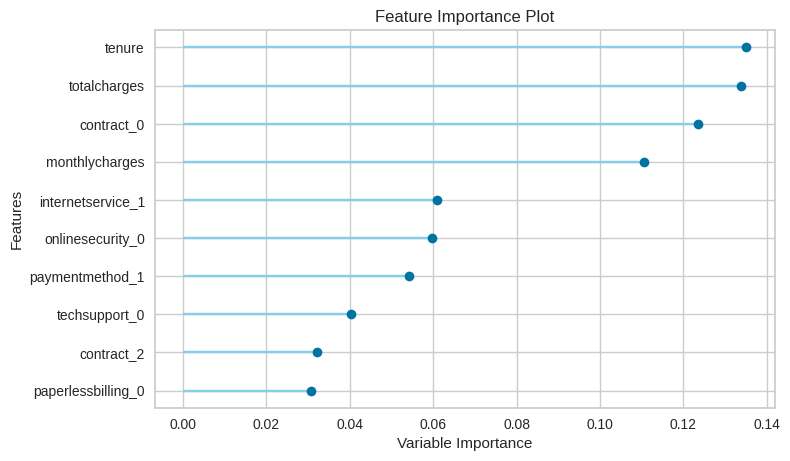

In [ ]:
plot_model(estimator = tuned_gbc, plot = 'feature')